# Using PaliGemma2-Mix as Remotely Sourced Zoo Model

In [1]:
import fiftyone as fo

from fiftyone.utils.huggingface import load_from_hub

dataset = load_from_hub(
    "voxel51/hand-keypoints",
    name="hands_subset",
    max_samples=10,
    )

Loading dataset
Importing samples...
 100% |███████████████████| 10/10 [2.6ms elapsed, 0s remaining, 3.9K samples/s]      
Migrating dataset 'hands_subset' to v1.4.1


For context, here is the first image:

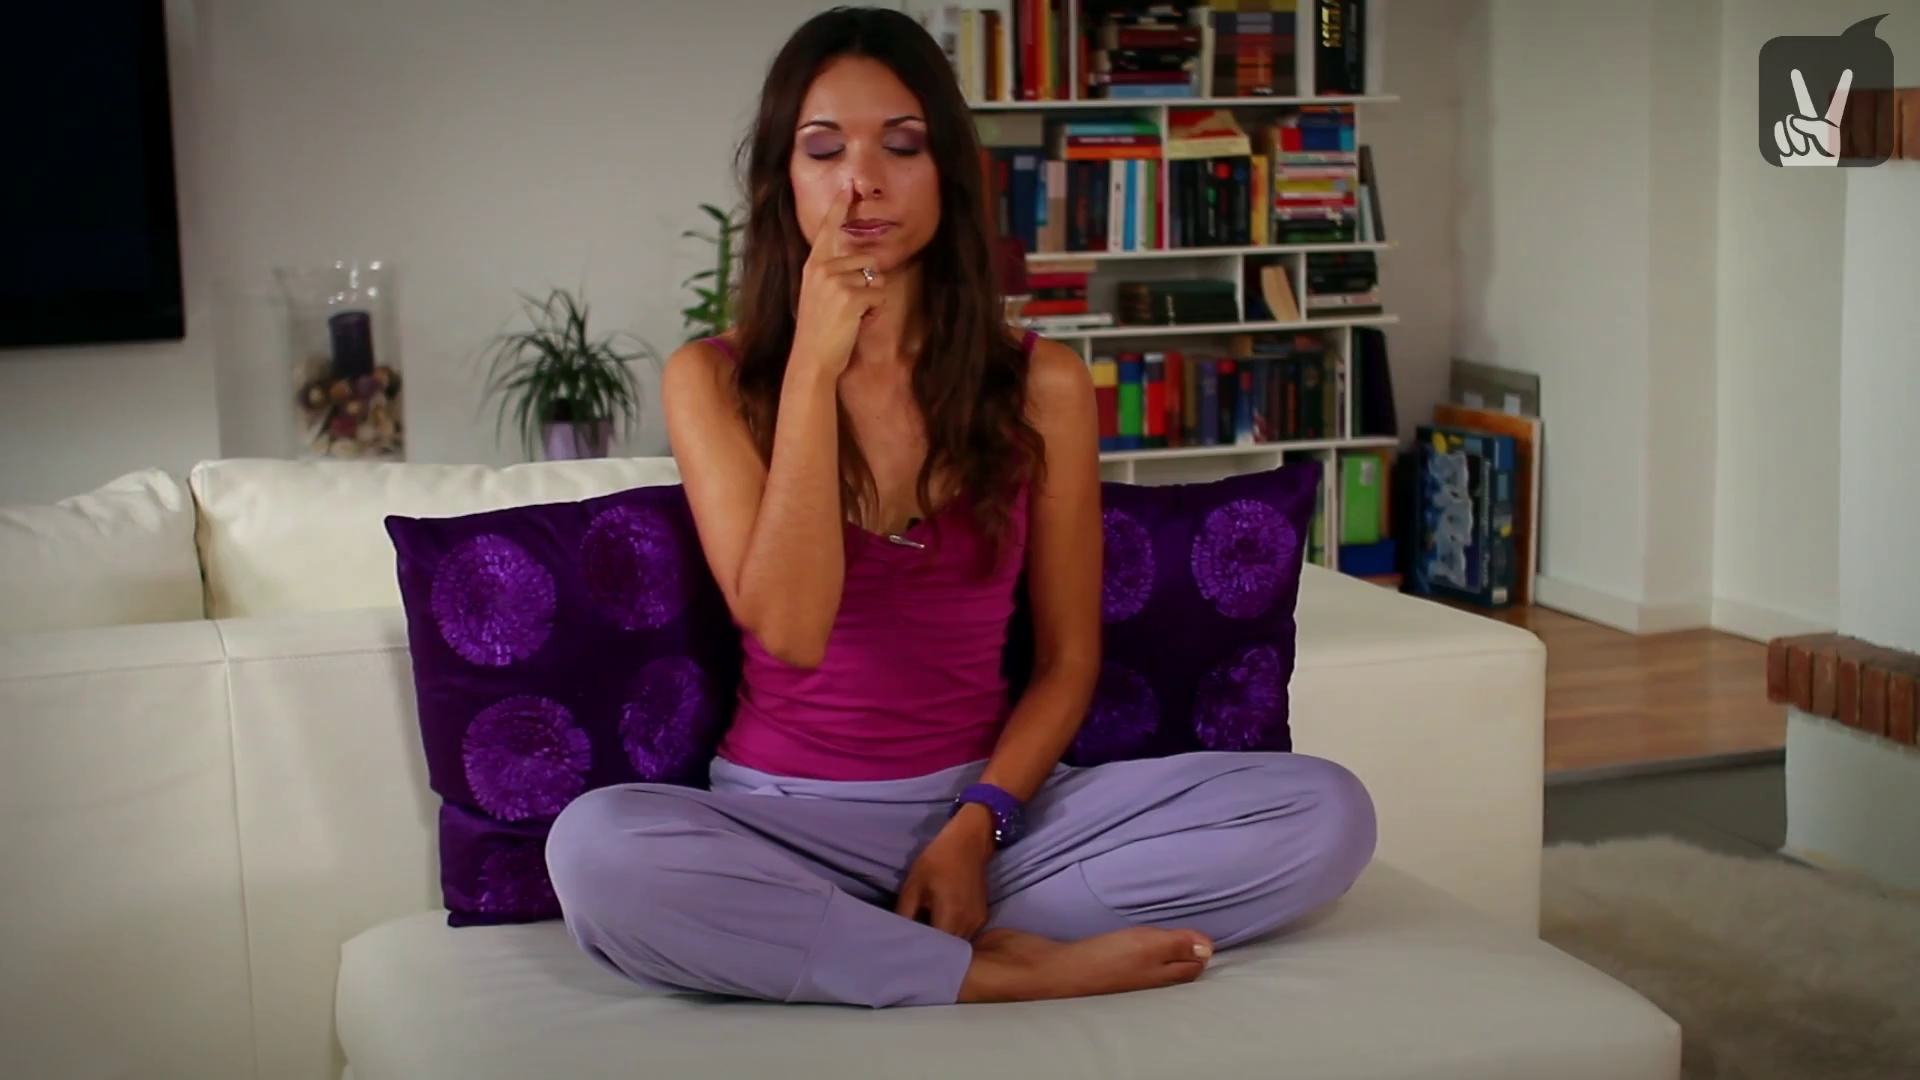

In [2]:
from PIL import Image

Image.open(dataset.first().filepath)

# Setup Zoo Model

In [ ]:
import fiftyone.zoo as foz
foz.register_zoo_model_source("https://github.com/harpreetsahota204/paligemma2", overwrite=True)

In [4]:
foz.download_zoo_model(
    "https://github.com/harpreetsahota204/paligemma2",
    model_name="google/paligemma2-10b-mix-448", 
)

(<fiftyone.zoo.models.RemoteZooModel at 0x7e5832fe3990>,
 '/home/harpreet/fiftyone/__models__/PaliGemma2-Mix/paligemma2-10b-mix-448')

In [5]:
import fiftyone.zoo as foz
model = foz.load_zoo_model(
    "google/paligemma2-10b-mix-448"
    )

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading PaliGemam2 Mix model from /home/harpreet/fiftyone/__models__/PaliGemma2-Mix/paligemma2-10b-mix-448


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

# Use PaliGemma2-Mix for Captions

The three captioning operations require no additional arguments beyond selecting the operation type. 

Supported `detail_level` values:

* `short`

*  `coco-style`

* `detailed`

In [6]:
model.operation="caption"
model.detail_level= "coco-style"

dataset.apply_model(model, label_field="coco_captions")

 100% |███████████████████| 10/10 [53.3s elapsed, 0s remaining, 0.2 samples/s]    


In [7]:
dataset.first()['coco_captions']

'A woman sits comfortably on a white couch, her legs crossed and a smile on her face. The room is filled with plants, including a green plant behind the couch and a small white plant on the table. A bookshelf stands behind the woman, filled with several books. A purple pillow sits on the couch next to the woman, and a purple pillow is behind her. The woman wears a purple shirt and a purple wristband. A small glass vase sits on the table in front of her. The girl in the image is wearing a purple shirt and a purple wristband. The girl is sitting on a white chair, holding a purple pillow. The couch is white, and the loveseat is also white. The black sign with the white logo is on the wall behind the woman. The plants in the room are green, and the pillow is purple. The woman is smiling, and the girl is smiling as well.'

To change the caption detail level:

In [8]:
model.detail_level= "detailed"

dataset.apply_model(model, label_field="detailed_captions")

dataset.first()['detailed_captions']

 100% |███████████████████| 10/10 [53.8s elapsed, 0s remaining, 0.2 samples/s]    


"A woman sits comfortably on a white couch, her legs crossed. She wears a pink shirt, purple pants, and a purple bracelet. A bookshelf stands behind her, filled with numerous books. A green plant sits on a table near the window, while a purple and white floral pillow rests on the couch. The woman's hair is long and brown, and her eyes are closed in concentration as she drinks from a glass."

# Use PaliGemma2-Mix for Detection

The operations for `detection`, `dense_region_caption`, `region_proposal` don't require additional parameters for general use. 

However, `open_vocabulary_detection` requires a `text_prompt` parameter to guide the detection towards specific objects. 

The results are stored as Detections objects containing bounding boxes and labels:

In [9]:
model.operation="detection"

model.prompt=["person", "bookshelf"] # you can also pass in a string like "horse; grass; train; sheep; home"

dataset.apply_model(model, label_field="detection_results")

dataset.first()['detection_results']

 100% |███████████████████| 10/10 [6.4s elapsed, 0s remaining, 1.6 samples/s]      


<Detections: {
    'detections': [
        <Detection: {
            'id': '68096c7e9f41316fdd12d9ed',
            'attributes': {},
            'tags': [],
            'label': 'bookshelf',
            'bounding_box': [0.4873046875, 0.0, 0.2392578125, 0.556640625],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
        }>,
        <Detection: {
            'id': '68096c7e9f41316fdd12d9ee',
            'attributes': {},
            'tags': [],
            'label': 'person',
            'bounding_box': [0.279296875, 0.0, 0.44140625, 0.935546875],
            'mask': None,
            'mask_path': None,
            'confidence': None,
            'index': None,
        }>,
    ],
}>

# Use PaliGemm2-Mix for Segmentation

Segmentation requires either a direct expression or a reference to a field containing expressions. 

Similar to phrase grounding, you can provide this in two ways:

In [10]:
model.operation="segment"

model.prompt= ["person relaxing", "person playing sports", "person talking"] #could pass a list of strings or a string delimited by , or ;

dataset.apply_model(model, label_field="segment_results")

   0% ||------------------|  0/10 [1.8ms elapsed, ? remaining, ? samples/s] 

 100% |███████████████████| 10/10 [33.4s elapsed, 0s remaining, 0.3 samples/s]    


# Use PaliGemm2-Mix for OCR



In [ ]:
model.operation="ocr"

dataset.apply_model(model, label_field="text")

In [ ]:
dataset.first()['text']

# Use PaliGemm2-Mix for Zero-Shot Classification

In [11]:
model.operation="classify"

model.prompt=["a person doing yoga", "a person playing sports", "a person talking to someone", "people working"]

dataset.apply_model(model, label_field="classify_results")

 100% |███████████████████| 10/10 [4.6s elapsed, 0s remaining, 2.2 samples/s]      


In [12]:
dataset.first()['classify_results']

<Classifications: {
    'classifications': [
        <Classification: {
            'id': '68096ca69f41316fdd12da1a',
            'tags': [],
            'label': 'a person doing yoga',
            'confidence': None,
            'logits': None,
        }>,
    ],
    'logits': None,
}>

# Use PaliGemm2-Mix for Answering Questions

Note: This will parse output as a FiftyOne Classification

In [13]:
model.operation="answer"

model.prompt="What activity are the people doing?"

dataset.apply_model(model, label_field="answer_results")

 100% |███████████████████| 10/10 [3.5s elapsed, 0s remaining, 2.8 samples/s]      


In [14]:
dataset.first()['answer_results']

<Classifications: {
    'classifications': [
        <Classification: {
            'id': '68096cab9f41316fdd12da24',
            'tags': [],
            'label': 'yoga',
            'confidence': None,
            'logits': None,
        }>,
    ],
    'logits': None,
}>

<img src = "paligemma.gif">